In [2]:
import pandas as pd

# ① 데이터 불러오기 ― 예시는 Excel, CSV일 때는 read_csv 사용
df = pd.read_excel('풍력_기상.xlsx')      # 또는 pd.read_csv('발전설비목록.csv')

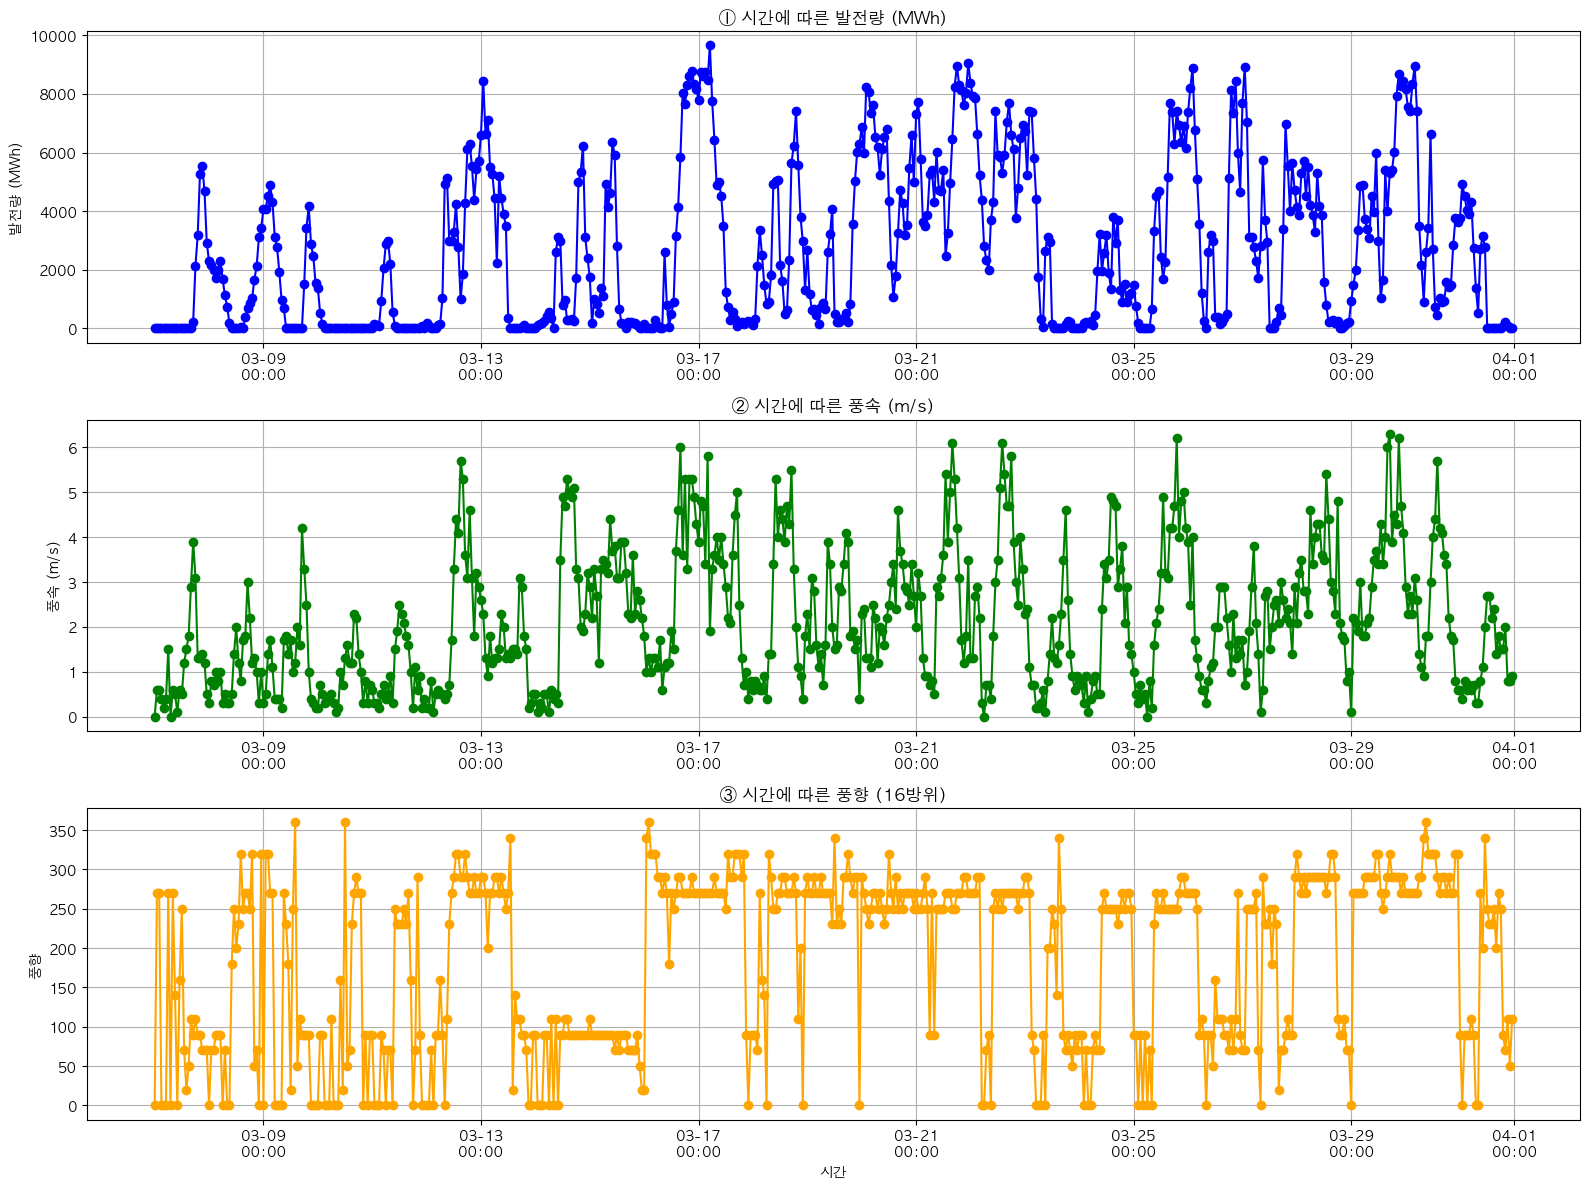

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
# 시각화를 위한 데이터프레임 복사
df_plot = df.copy()
df_plot['시각'] = pd.to_datetime(df_plot['시각'])

# 그래프 스타일 설정
plt.figure(figsize=(16, 12))

# 1. 발전량 시계열
plt.subplot(3, 1, 1)
plt.plot(df_plot['시각'], df_plot['발전량(MWh)'], color='blue', marker='o', linestyle='-')
plt.title('① 시간에 따른 발전량 (MWh)')
plt.ylabel('발전량 (MWh)')
plt.grid(True)

# 2. 풍속 시계열
plt.subplot(3, 1, 2)
plt.plot(df_plot['시각'], df_plot['풍속(m/s)'], color='green', marker='o', linestyle='-')
plt.title('② 시간에 따른 풍속 (m/s)')
plt.ylabel('풍속 (m/s)')
plt.grid(True)

# 3. 풍향 시계열
plt.subplot(3, 1, 3)
plt.plot(df_plot['시각'], df_plot['풍향(16방위)'], color='orange', marker='o', linestyle='-')
plt.title('③ 시간에 따른 풍향 (16방위)')
plt.ylabel('풍향')
plt.xlabel('시간')
plt.grid(True)

# x축 포맷 정리
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%H:%M'))
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [4]:
# 상관관계 계산 (풍속 vs 발전량)
correlation = df[['풍속(m/s)', '발전량(MWh)']].corr()

correlation


,풍속(m/s),발전량(MWh)
풍속(m/s),1.000000,0.368504
발전량(MWh),0.368504,1.000000


In [5]:
# 발전량이 0보다 큰 값만 필터링
nonzero_df = df[df['발전량(MWh)'] > 0]

# 상관관계 재계산 (풍속 vs 발전량)
correlation_nonzero = nonzero_df[['풍속(m/s)', '발전량(MWh)']].corr()

correlation_nonzero


,풍속(m/s),발전량(MWh)
풍속(m/s),1.000000,0.279983
발전량(MWh),0.279983,1.000000


전체 데이터 상관계수:
           풍속(m/s)  발전량(MWh)
풍속(m/s)   1.000000  0.368504
발전량(MWh)  0.368504  1.000000


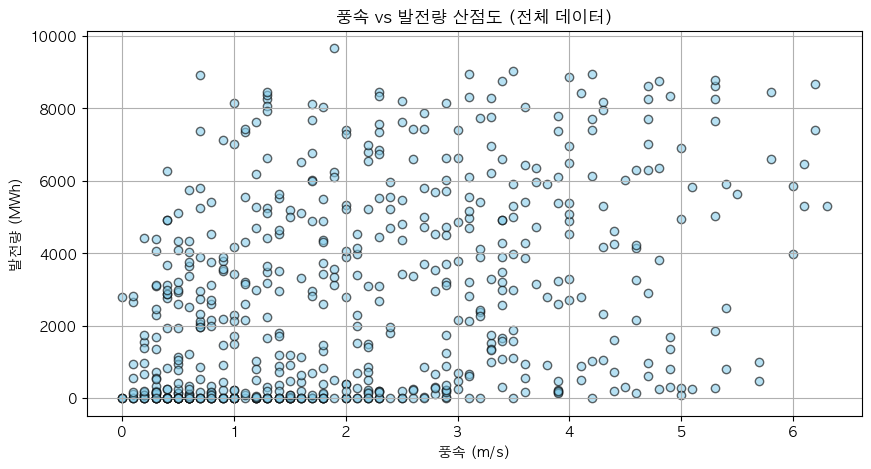

In [6]:
# 상관관계 출력 (전체 데이터)
print("전체 데이터 상관계수:")
print(df[['풍속(m/s)', '발전량(MWh)']].corr())

# 산점도 그리기
plt.figure(figsize=(10, 5))
plt.scatter(df['풍속(m/s)'], df['발전량(MWh)'], alpha=0.6, color='skyblue', edgecolor='k')
plt.title('풍속 vs 발전량 산점도 (전체 데이터)')
plt.xlabel('풍속 (m/s)')
plt.ylabel('발전량 (MWh)')
plt.grid(True)
plt.show()

발전량 > 0인 경우 상관계수:
           풍속(m/s)  발전량(MWh)
풍속(m/s)   1.000000  0.279983
발전량(MWh)  0.279983  1.000000


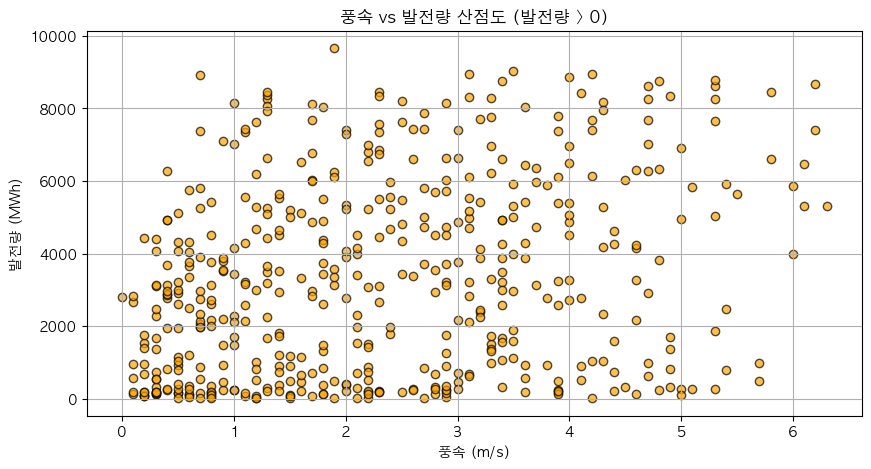

In [7]:
# 발전량 > 0인 경우만 분석
df_nonzero = df[df['발전량(MWh)'] > 0]

print("발전량 > 0인 경우 상관계수:")
print(df_nonzero[['풍속(m/s)', '발전량(MWh)']].corr())

# 산점도
plt.figure(figsize=(10, 5))
plt.scatter(df_nonzero['풍속(m/s)'], df_nonzero['발전량(MWh)'], alpha=0.7, color='orange', edgecolor='k')
plt.title('풍속 vs 발전량 산점도 (발전량 > 0)')
plt.xlabel('풍속 (m/s)')
plt.ylabel('발전량 (MWh)')
plt.grid(True)
plt.show()

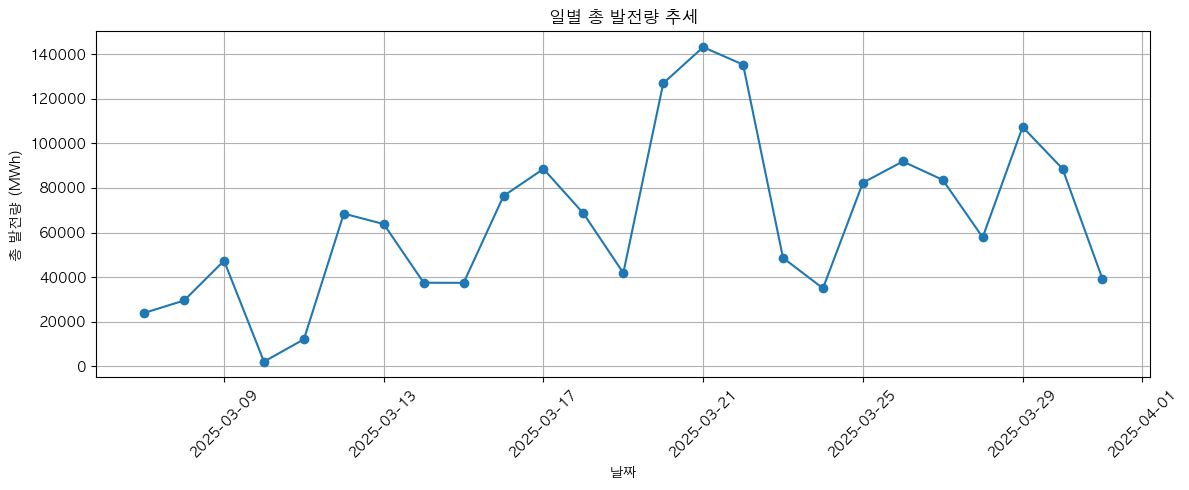

In [8]:
# 시각 컬럼을 datetime으로 변환
df['시각'] = pd.to_datetime(df['시각'])

# 일 단위 집계
daily_df = df.groupby(df['시각'].dt.date)['발전량(MWh)'].sum().reset_index()
daily_df.columns = ['일자', '총발전량']

# 시계열 시각화
plt.figure(figsize=(12, 5))
plt.plot(daily_df['일자'], daily_df['총발전량'], marker='o')
plt.title('일별 총 발전량 추세')
plt.xlabel('날짜')
plt.ylabel('총 발전량 (MWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

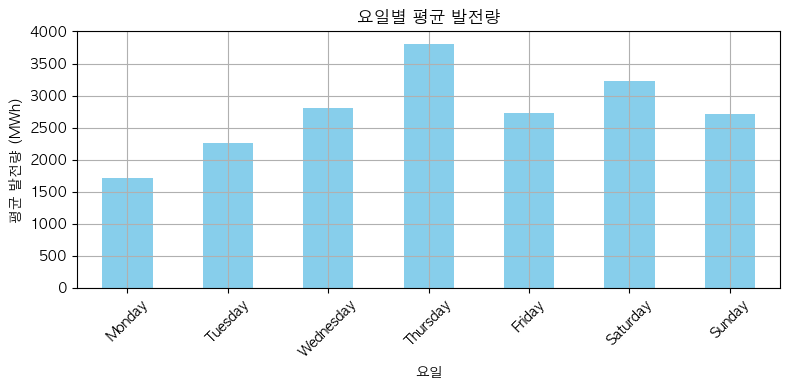

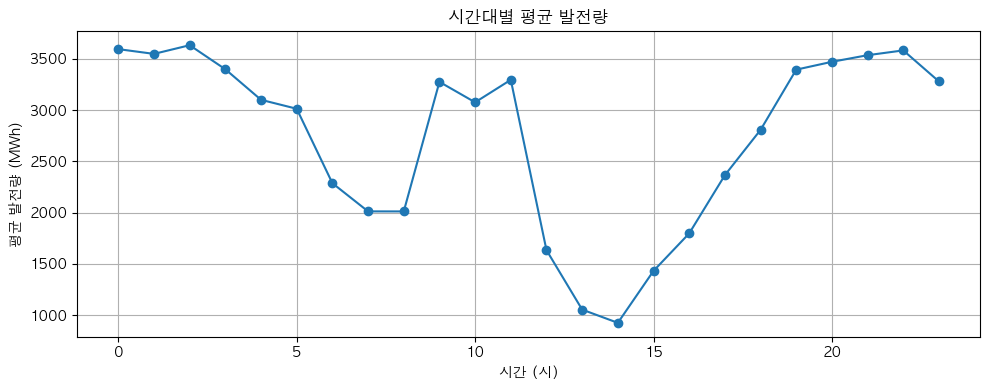

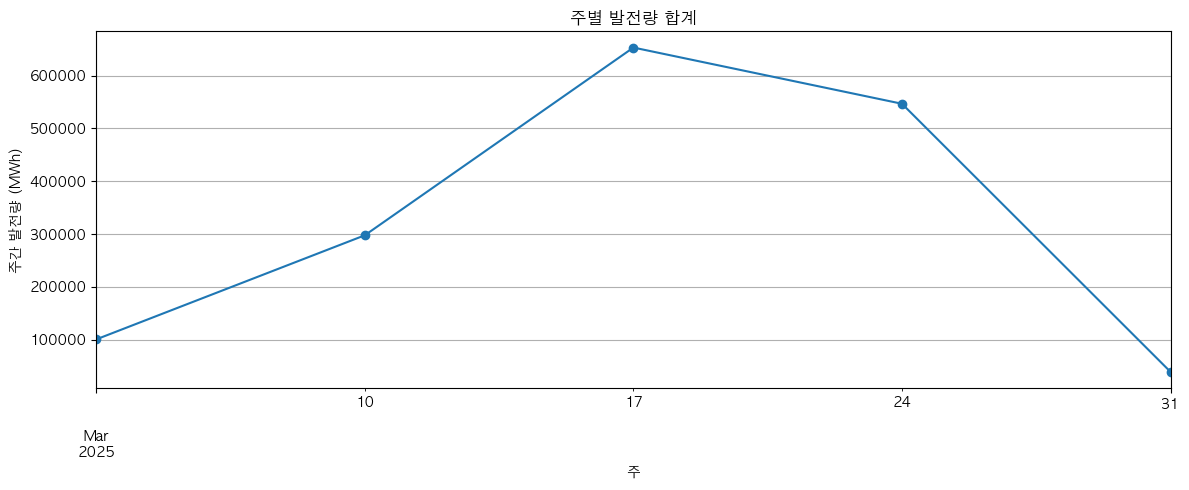

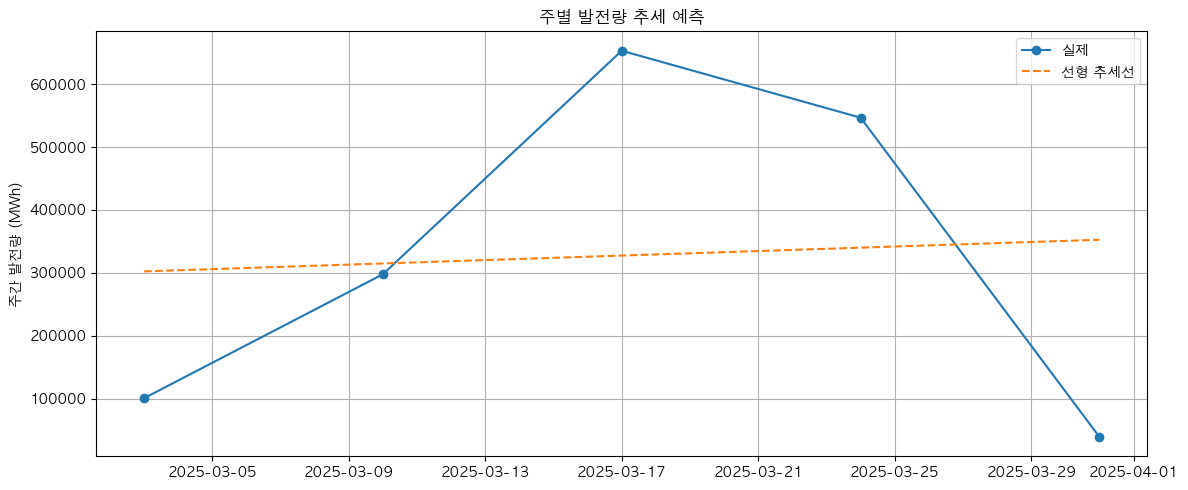

In [ ]:
df['시각'] = pd.to_datetime(df['시각'])

# 2. 요일별 분석
df['요일'] = df['시각'].dt.day_name()  # 월요일~일요일
weekday_avg = df.groupby('요일')['발전량(MWh)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 4))
weekday_avg.plot(kind='bar', color='skyblue')
plt.title('요일별 평균 발전량')
plt.ylabel('평균 발전량 (MWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 시간대별 분석
df['시간'] = df['시각'].dt.hour
hour_avg = df.groupby('시간')['발전량(MWh)'].mean()

plt.figure(figsize=(10, 4))
hour_avg.plot(kind='line', marker='o')
plt.title('시간대별 평균 발전량')
plt.xlabel('시간 (시)')
plt.ylabel('평균 발전량 (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. 주별 발전량 시계열 + 시계열 예측 (statsmodels)
df['주'] = df['시각'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_df = df.groupby('주')['발전량(MWh)'].sum()

# 시계열 시각화
plt.figure(figsize=(12, 5))
weekly_df.plot(marker='o')
plt.title('주별 발전량 합계')
plt.ylabel('주간 발전량 (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

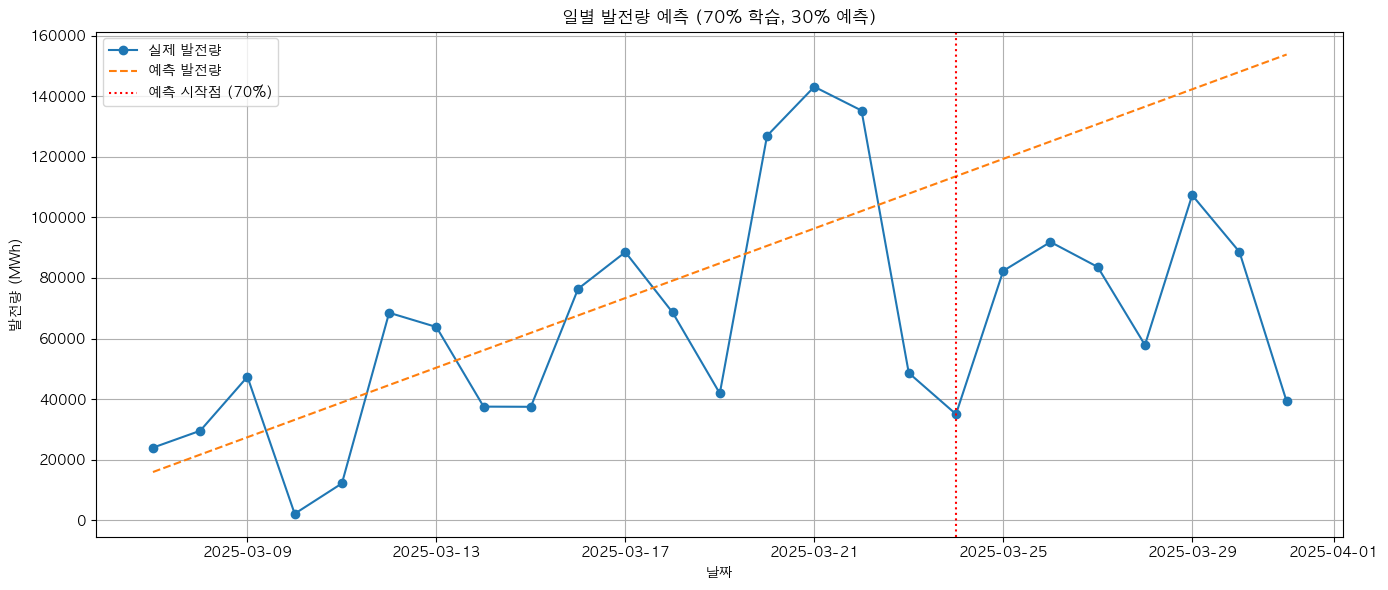

예측 구간 RMSE: 66137.50 MWh


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df['시각'] = pd.to_datetime(df['시각'])

# 2. 일 단위 집계
daily_df = df.groupby(df['시각'].dt.date)['발전량(MWh)'].sum().reset_index()
daily_df.columns = ['일자', '총발전량']

# 3. 인덱스를 시계열 숫자열로 대체 (0, 1, 2, ...)
daily_df['일자'] = pd.to_datetime(daily_df['일자'])
daily_df['순번'] = np.arange(len(daily_df))

# 4. 학습 / 예측 분리 (70% : 30%)
cut = int(len(daily_df) * 0.7)
train = daily_df.iloc[:cut]
test = daily_df.iloc[cut:]

# 5. 선형 회귀 학습
X_train = train['순번'].values.reshape(-1, 1)
y_train = train['총발전량'].values
model = LinearRegression().fit(X_train, y_train)

# 6. 예측
X_all = daily_df['순번'].values.reshape(-1, 1)
daily_df['예측값'] = model.predict(X_all)

# 7. 시각화
plt.figure(figsize=(14, 6))
plt.plot(daily_df['일자'], daily_df['총발전량'], label='실제 발전량', marker='o')
plt.plot(daily_df['일자'], daily_df['예측값'], label='예측 발전량', linestyle='--')
plt.axvline(x=daily_df['일자'].iloc[cut], color='red', linestyle=':', label='예측 시작점 (70%)')
plt.title('일별 발전량 예측 (70% 학습, 30% 예측)')
plt.xlabel('날짜')
plt.ylabel('발전량 (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. 성능 지표 (예측 구간에서 RMSE)
mse = mean_squared_error(test['총발전량'], daily_df['예측값'].iloc[cut:])
rmse = np.sqrt(mse)
print(f'예측 구간 RMSE: {rmse:.2f} MWh')


/opt/anaconda3/envs/sl/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
LSTM 예측 RMSE: 24285.41 MWh


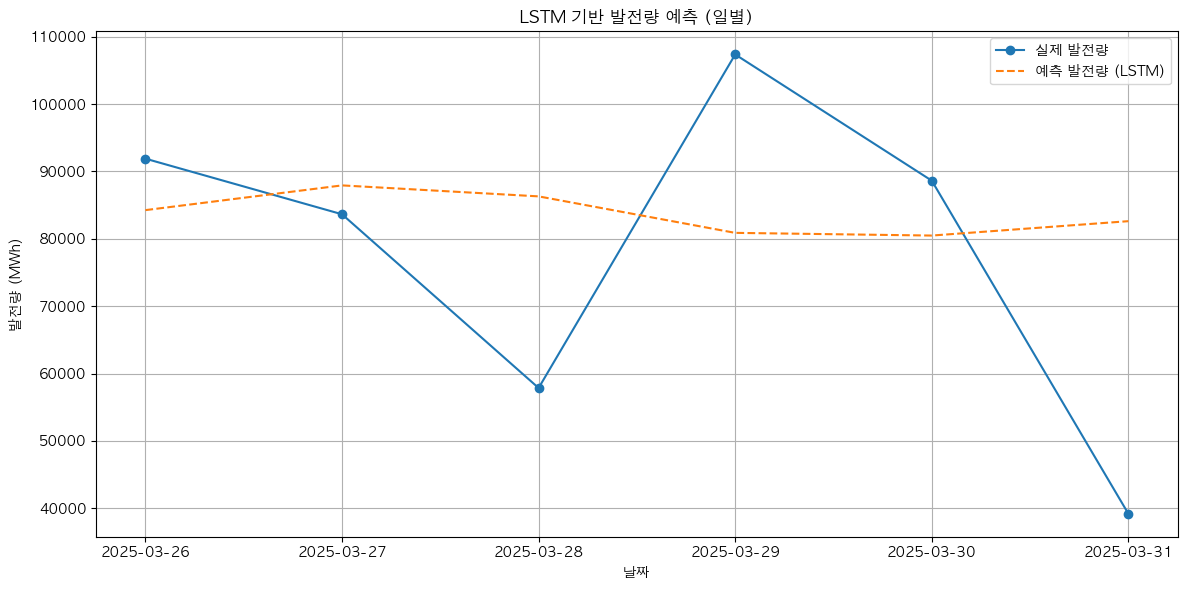

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# 2. 일별 발전량 집계
daily_df = df.groupby(df['시각'].dt.date)['발전량(MWh)'].sum().reset_index()
daily_df.columns = ['일자', '총발전량']
daily_df['일자'] = pd.to_datetime(daily_df['일자'])

# 3. 정규화 (0~1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(daily_df[['총발전량']])

# 4. 시계열 분할 함수 (sliding window)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 7  # 7일치로 다음날 예측
X, y = create_sequences(scaled, window_size)

# 5. train/test split (70:30)
split = int(len(X) * 0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6. LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 7. 모델 학습
model.fit(X_train, y_train, epochs=100, verbose=0)

# 8. 예측
y_pred = model.predict(X_test)

# 9. 역정규화
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# 10. RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'LSTM 예측 RMSE: {rmse:.2f} MWh')

# 11. 시각화
test_dates = daily_df['일자'][window_size + split:window_size + split + len(y_test)]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inv, label='실제 발전량', marker='o')
plt.plot(test_dates, y_pred_inv, label='예측 발전량 (LSTM)', linestyle='--')
plt.title('LSTM 기반 발전량 예측 (일별)')
plt.xlabel('날짜')
plt.ylabel('발전량 (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


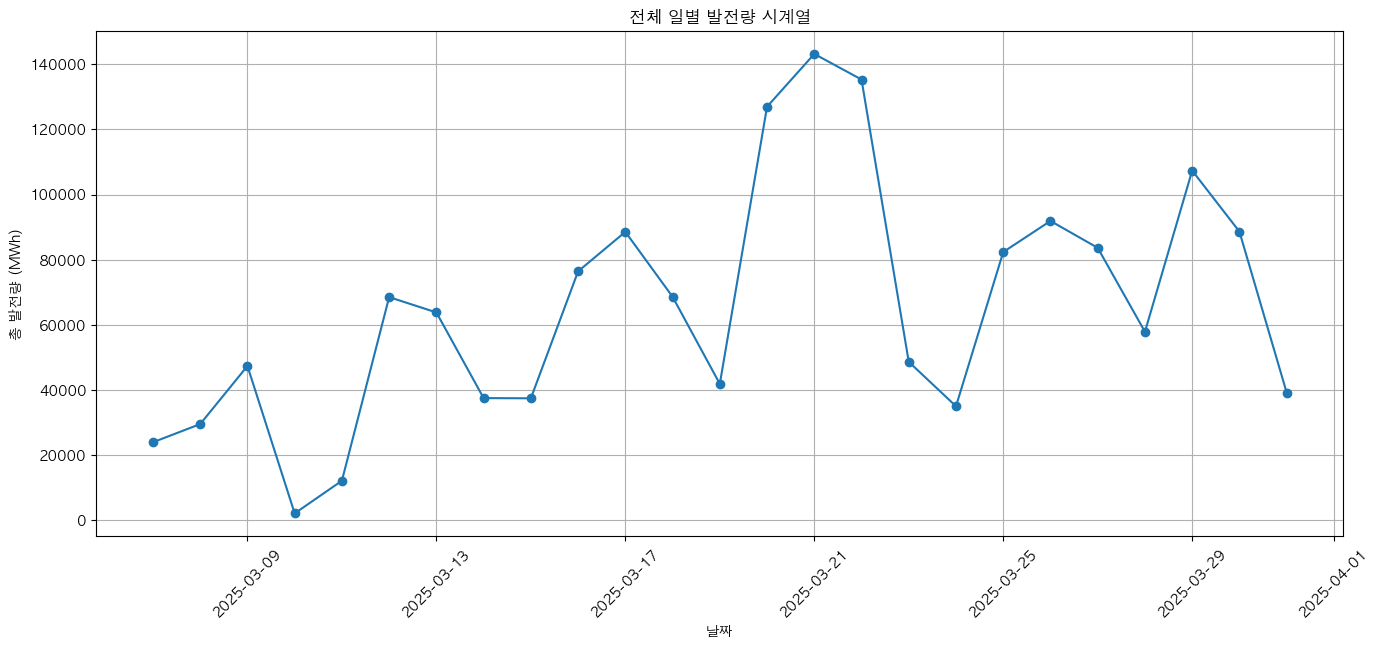

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# 2. 일 단위로 집계
daily_df = df.groupby(df['시각'].dt.date)['발전량(MWh)'].sum().reset_index()
daily_df.columns = ['일자', '총발전량']
daily_df['일자'] = pd.to_datetime(daily_df['일자'])

# 3. 시각화
plt.figure(figsize=(14, 6))
plt.plot(daily_df['일자'], daily_df['총발전량'], marker='o', linestyle='-')
plt.title('전체 일별 발전량 시계열')
plt.xlabel('날짜')
plt.ylabel('총 발전량 (MWh)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

# 1. 일별 평균 발전량
mean_power = daily_df['총발전량'].mean()
print(f'일별 평균 발전량: {mean_power:.2f} MWh')

# 2. MAPE 계산 (예측 구간만 비교)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
print(f'LSTM 예측의 MAPE: {mape:.2f}%')


일별 평균 발전량: 65510.01 MWh
LSTM 예측의 MAPE: 34.54%


/opt/anaconda3/envs/sl/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
⛽ RMSE: 1425.95 MWh
📉 MAPE: 10130447019278336000.00%


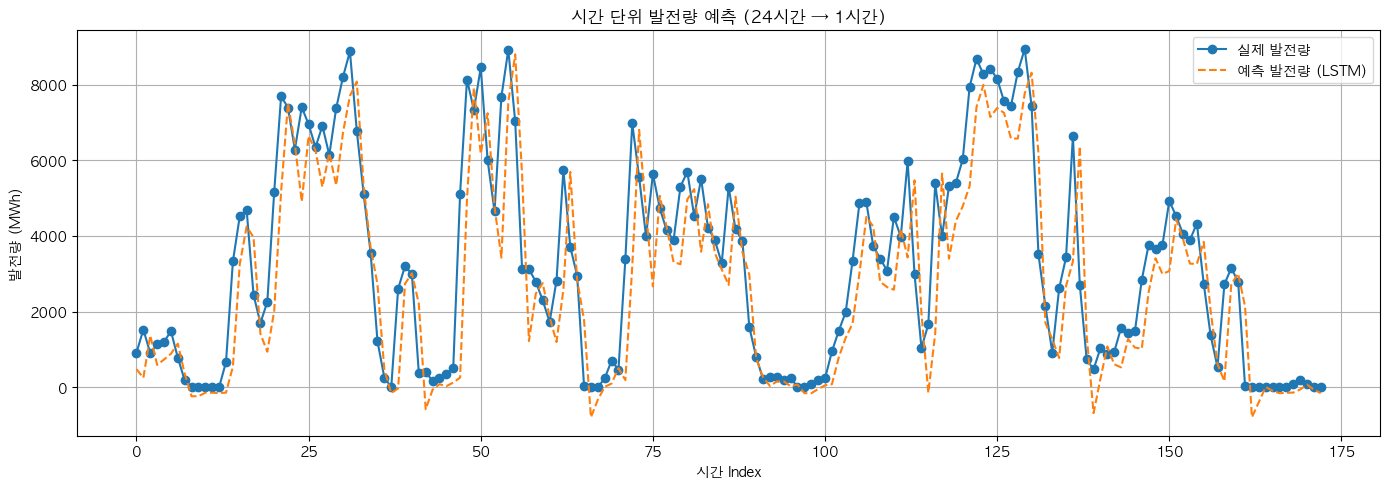

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# 2. 시간 단위로 정렬
df = df.sort_values('시각')

# # 3. 정규화
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df[['발전량(MWh)']])

# 4. 시계열 입력 (24시간 → 다음 1시간)
def create_sequences(data, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window_size=24)

# 5. 학습/테스트 split (70:30)
split = int(len(X) * 0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6. LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(24, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 7. 학습
model.fit(X_train, y_train, epochs=50, verbose=0)

# 8. 예측
y_pred = model.predict(X_test)

# 9. 역정규화
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# 10. 성능 평가
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

print(f'⛽ RMSE: {rmse:.2f} MWh')
print(f'📉 MAPE: {mape:.2f}%')

# 11. 시각화
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='실제 발전량', marker='o')
plt.plot(y_pred_inv, label='예측 발전량 (LSTM)', linestyle='--')
plt.title('시간 단위 발전량 예측 (24시간 → 1시간)')
plt.xlabel('시간 Index')
plt.ylabel('발전량 (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
